<a href="https://colab.research.google.com/github/vasconce1o/fallen-bowling-counter/blob/main/fallen_bowling_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fallen bowling counter



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


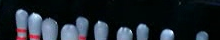

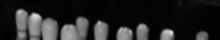

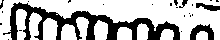

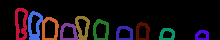

10


In [60]:
import cv2
import random as rng
import numpy as np
from matplotlib import pyplot as plt

# Código específico para Google Colab
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

# Lectura de la imagén
# Y recorte de la parte de arriba de los bolos,
# de manera que si no existen estas partes es porque 
# el bolo fue derribado.

img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/fallen_bowling_counter/bowling.jpg") 
# crop = img[Y:Y+H, X:X+W]
crop = img[90:130, 110:330]
h, w, c = crop.shape
crop_area = h*w
min_area = crop_area*0.005
max_area = crop_area*0.05

gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(3,3),0)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Remove small noise by filtering using contour area and count
bowling_counter = 0
drawing = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(len(cnts)):
  area = cv2.contourArea(cnts[i])
  if max_area > area > min_area :
    bowling_counter+=1
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(drawing, cnts, i, color, 2, cv2.LINE_8, hierarchy, 0)


cv2_imshow(crop)
cv2_imshow(gray)
cv2_imshow(thresh)
cv2_imshow(drawing)
print(bowling_counter)
